철강데이터 종속변수 : target  
데이터 출처 : https://www.kaggle.com/uciml/faulty-steel-plates  

1-1) EDA(탐색적 데이터 분석)을 하시오 (시각화와 통계량을 제시할 것)   
1-2) 변수 선택(VIF), 파생변수 생성, 데이터 분할(train/validation/test(20%))
(시각화와 통계량을 제시할 것)  
1-3) 종속변수들 중 "1"인지 아닌지 판단하려 한다. 종속변수를 1과 1이 아닌 값(이항)으로 치환하고 로지스틱 회귀 분석을 실시하라.  
confusionMatrix를 확인하고 최적의 cut off value 정하여라.  
1-4) 종속변수(y)를 다항(7 class)인 상태에서 SVM을 포함하여 3가지 알고리즘으로 평가하라.
각 모델에서 confusionMatrix를 확인하고 최적의 cut off value 를 정하여라.  
1-5) 종속변수를 제외한 나머지 데이터를 바탕으로 군집분석을 실시하고 최적의 군집수와 군집 레이블을 구하여라.
군집레이블을 추가한 데이터를 1-4에서 만든 모델중 가장 성능이 좋았던 하나의 모델에 다시 학습하여 F1-score를 비교하라  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
pd.set_option('display.float_format', lambda x: '%.5f' % x)
warnings.filterwarnings("ignore")

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/data/adp/week14_기출4/problem1.csv')
df1.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,target
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.47060,1.00000,1.00000,2.42650,0.90310,1.64350,0.81820,-0.29130,0.58220,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.60000,0.96670,1.00000,2.03340,0.77820,1.46240,0.79310,-0.17560,0.29840,1
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.75000,0.94740,1.00000,1.85130,0.77820,1.25530,0.66670,-0.12280,0.21500,1
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.53850,1.00000,1.00000,2.24550,0.84510,1.65320,0.84440,-0.15680,0.52120,1
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.28330,0.98850,1.00000,3.38180,1.23050,2.40990,0.93380,-0.19920,1.00000,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

### 1-1) EDA(탐색적 데이터 분석)을 하시오 (시각화와 통계량을 제시할 것)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1543e180d0>,
      dtype=object)

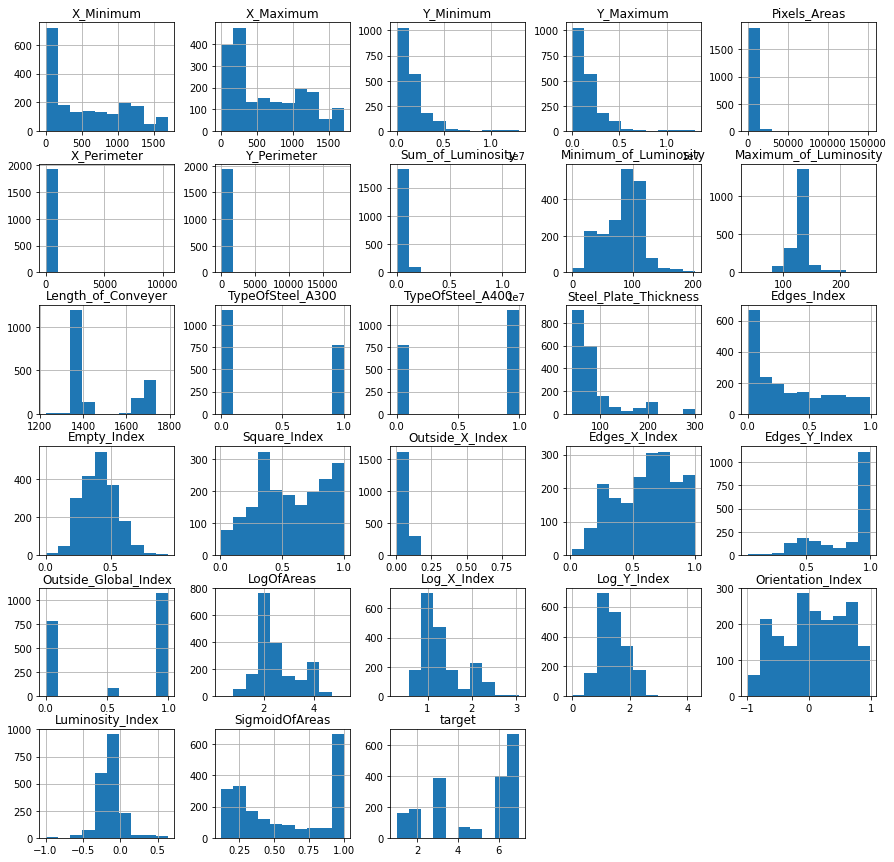

In [ ]:
df1.hist(figsize = (15,15))

In [ ]:
## density plot 확인하기
df1.plot(kind = 'density', layout = (7,4), subplots = True, sharex = False, sharey = False, figsize = (15,15))

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
X_Minimum,1941.00000,571.13601,520.69067,0.00000,51.00000,435.00000,1053.00000,1705.00000
X_Maximum,1941.00000,617.96445,497.62741,4.00000,192.00000,467.00000,1072.00000,1713.00000
Y_Minimum,1941.00000,1650684.86811,1774578.41473,6712.00000,471253.00000,1204128.00000,2183073.00000,12987661.00000
Y_Maximum,1941.00000,1650738.70531,1774590.08900,6724.00000,471281.00000,1204136.00000,2183084.00000,12987692.00000
Pixels_Areas,1941.00000,1893.87841,5168.45956,2.00000,84.00000,174.00000,822.00000,152655.00000
X_Perimeter,1941.00000,111.85523,301.20919,2.00000,15.00000,26.00000,84.00000,10449.00000
Y_Perimeter,1941.00000,82.96600,426.48288,1.00000,13.00000,25.00000,83.00000,18152.00000
Sum_of_Luminosity,1941.00000,206312.14786,512293.58761,250.00000,9522.00000,19202.00000,83011.00000,11591414.00000
Minimum_of_Luminosity,1941.00000,84.54869,32.13428,0.00000,63.00000,90.00000,106.00000,203.00000
Maximum_of_Luminosity,1941.00000,130.19371,18.69099,37.00000,124.00000,127.00000,140.00000,253.00000


- 범주형변수: TypeOfSteel_A300, TypeOfSteel_A400, Outside_Global_Index
- 데이터가 치우친 변수: X_Maximum, X_Minimum, Y_Maximum, Y_Minimum, Pixels_Areas, X_Perimeter, Y_Perimeter, Sum_of_Luminosity, Minimum_of_Luminosity, Maximum_of_Luminosity, Length_of_Conveyer, Steel_Plate_Thickness, Edge_Index, Square_Index, Outside_X_Index
- 정규분포에 가까움: Empty_Index, Luminosity_Index

In [ ]:
## y 변수의 범주를 확인
sns.countplot(df1.target)

In [ ]:
df1.corr().style.background_gradient().set_properties(**{'font-size':'10pt'})

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,target
X_Minimum,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,0.316662,0.144319,-0.144319,0.136625,0.278075,-0.198461,0.063658,-0.361160,0.154778,0.367907,0.147282,-0.428553,-0.437944,-0.326851,0.178585,-0.031578,-0.355251,0.291760
X_Maximum,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,0.299390,0.112009,-0.112009,0.106119,0.242846,-0.152680,0.048575,-0.214930,0.149259,0.271915,0.099253,-0.332169,-0.324012,-0.265990,0.115019,-0.038996,-0.286736,0.269444
Y_Minimum,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,-0.049211,0.075164,-0.075164,-0.207640,0.021314,-0.043117,-0.006135,0.054165,0.066085,-0.036543,-0.062911,0.044952,0.070406,-0.008442,-0.086497,-0.090654,0.025257,0.000106
Y_Maximum,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,-0.049219,0.075151,-0.075151,-0.207644,0.021300,-0.043085,-0.006152,0.054185,0.066051,-0.036549,-0.062901,0.044994,0.070432,-0.008382,-0.086480,-0.090666,0.025284,0.000093
Pixels_Areas,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,-0.155853,-0.235591,0.235591,-0.183735,-0.275289,0.272808,0.017865,0.588606,-0.294673,-0.463571,-0.109655,0.650234,0.603072,0.578342,-0.137604,-0.043449,0.422947,-0.239093
X_Perimeter,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,-0.134240,-0.189250,0.189250,-0.147712,-0.227590,0.306348,0.004507,0.517098,-0.293039,-0.412100,-0.079106,0.563036,0.524716,0.523472,-0.101731,-0.032617,0.380605,-0.190590
Y_Perimeter,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,-0.063825,-0.095154,0.095154,-0.058889,-0.111240,0.188825,-0.047511,0.209160,-0.195162,-0.136723,0.013438,0.294040,0.228485,0.344378,0.031381,-0.047778,0.191772,-0.096233
Sum_of_Luminosity,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,-0.169331,-0.263632,0.263632,-0.204812,-0.301452,0.293691,0.049607,0.658339,-0.327728,-0.529745,-0.121090,0.712128,0.667736,0.618795,-0.158483,-0.014067,0.464248,-0.264962
Minimum_of_Luminosity,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,-0.023579,0.042048,-0.042048,0.103393,0.358915,-0.044111,0.066748,-0.487574,0.252256,0.316610,0.035462,-0.678762,-0.567655,-0.588208,0.057123,0.669534,-0.514797,0.289873
Maximum_of_Luminosity,-0.075554,-0.062392,-0.067785,-0.067776,0.110063,0.111363,0.061809,0.136515,0.429605,1.000000,-0.098009,-0.216339,0.216339,-0.128397,0.149675,0.031425,0.065517,0.099300,0.093522,-0.167441,-0.124039,0.007672,0.092823,-0.069522,-0.169747,0.870160,-0.039651,0.018774


서로 상관성이 높은 변수  
- SigmoidOfAreas, LogOfAreas,Log_X_Index, Log_Y_Index 
- Orientation_IIndex, Outside_Global_Index, Edge_Y_Index
- Luminosity_Index, Maximum/Minimum of Luminosity
- Pixels_Areas, X_Perimeter, Y_Perimeter, Sum_of_Luminosity
- X_Maximum, X_Minimum
- Y_Maximum, Y_Minimum

EDA로 확인한 내용
- NA값이 들어간 데이터는 없음
- 데이터 불균형이 확인됨. 2번에서 요구하는 것처럼 hold out 방법으로 데이터를 적합시키려면 oversampling을 해야 할 것 같음. 
- 변수의 개수가 많고 서로 개념적/수치적으로 상관성이 높은 변수들이 있어 변수선택이 필요함.
- X 변수끼리 scale의 차이가 있어서 표준화 필요성이 있음

In [ ]:
## Normalization
normalized_df1=(df1-df1.min())/(df1.max()-df1.min())

### 1-2) 변수 선택(VIF), 파생변수 생성, 데이터 분할(train/validation/test(20%)) (시각화와 통계량을 제시할 것)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df1_vif = pd.DataFrame()
df1_vif['VIF_Factor'] = [variance_inflation_factor(normalized_df1.iloc[:,:-1].values, i) for i in range(normalized_df1.iloc[:,:-1].shape[1])]
df1_vif['Feature'] = normalized_df1.iloc[:,:-1].columns
df1_vif.sort_values(by = 'VIF_Factor', ascending = True)

,VIF_Factor,Feature
13,1.26658,Steel_Plate_Thickness
14,1.32192,Edges_Index
16,1.83838,Square_Index
10,1.93146,Length_of_Conveyer
18,5.70824,Edges_X_Index
20,5.83132,Outside_Global_Index
9,6.03640,Maximum_of_Luminosity
8,8.32432,Minimum_of_Luminosity
19,9.43862,Edges_Y_Index
26,9.61115,SigmoidOfAreas


보통 vif 값이 15를 넘으면 변수 간에 다중공선성이 있다고 판단한다. 가장 큰 값부터 변수를 어떻게 변경할지 생각해본다면, 
- X/Y_Maximum/Minimum 값 : Minimum과 Maximum 값을 더하고 평균낸 값으로 대체한다
- Y_Perimeter: Pixel_Areas, X_Perimeter, Y_Perimeter, Sum_of_Luminosity는 서로 상관성이 높기 떄문에, 어떤 데이터인지는 확실치 않으나 네 변수의 Scale을 맞춰주고 평균값으로 대체한다.
- LogOfAreas: Log_X_Index, Log_Y_Index 와 상관성이 높기 때문에 변수에서 제외한다. 또한 두 값을 더한 평균을 새로운 변수로 넣는다.
- Outside_X_Index: Log_Areas 그룹 외 다른 변수들과도 두루 연관성이 높기 떄문에 삭제
- TypeofSteel_A400: TypeOfSteel_A300과 상관계수가 -1인 binary type variable이므로 모든 데이터는 스틸타입 A400 또는 A300 중 한가지를 선택함. 따라서 한 변수는 삭제해도 상관없음.
- Orientation_Index: Edge_Y_Index, Outside_Global_Index와 상관성이 높음. 두 변수는 vif가 10보다 작기 때문에 남겨두고 Orientation_Index만 삭제한다.
- Empty Index: 강한 상관관계를 보이는 변수가 없기 때문에 위의 변수들을 처리한 상태에서도 vif가 높다면 삭제


In [ ]:
normalized_df1['average_X'] = (normalized_df1['X_Maximum'] + normalized_df1['X_Minimum'])/2
normalized_df1['average_Y'] = (normalized_df1['Y_Maximum'] + normalized_df1['Y_Minimum'])/2
normalized_df1['Log_Index'] = (normalized_df1['Log_X_Index'] + normalized_df1['Log_Y_Index'])/2  
normalized_df1['perimeter_average'] = (normalized_df1['Y_Perimeter']+normalized_df1['Pixels_Areas']+normalized_df1['X_Perimeter']+normalized_df1['Sum_of_Luminosity'])/4


normalized_df1.drop(columns = ['X_Maximum', 'X_Minimum', 'Y_Maximum', 'Y_Minimum', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Y_Perimeter', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
                    'Outside_X_Index', 'TypeOfSteel_A400', 'Orientation_Index'], axis = 1, inplace = True)

In [ ]:
col_list = normalized_df1.columns.to_list()
col_list.remove('target')

In [ ]:
## VIF가 제대로 사라졌는지 다시 한 번 확인
df1_vif = pd.DataFrame()
df1_vif['VIF_Factor'] = [variance_inflation_factor(normalized_df1[col_list].values, i) for i in range(normalized_df1[col_list].shape[1])]
df1_vif['Feature'] = normalized_df1[col_list].columns
df1_vif.sort_values(by = 'VIF_Factor', ascending = True)

,VIF_Factor,Feature
4,1.85879,Steel_Plate_Thickness
14,2.03271,average_Y
16,2.32358,perimeter_average
3,2.48794,TypeOfSteel_A300
5,2.90788,Edges_Index
13,3.05578,average_X
2,4.97711,Length_of_Conveyer
10,5.27294,Outside_Global_Index
7,6.56895,Square_Index
8,14.31401,Edges_X_Index


In [ ]:
df1.corr().style.background_gradient().set_properties(**{'font-size':'10pt'})

,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,Luminosity_Index,SigmoidOfAreas,target,average_X,average_Y,Log_Index,perimeter_average
Minimum_of_Luminosity,1.000000,0.429605,-0.023579,0.042048,0.103393,0.358915,-0.044111,0.066748,0.252256,0.316610,0.035462,0.669534,-0.514797,0.289873,0.204523,-0.065718,-0.646015,-0.540053
Maximum_of_Luminosity,0.429605,1.000000,-0.098009,-0.216339,-0.128397,0.149675,0.031425,0.065517,0.093522,-0.167441,-0.124039,0.870160,-0.039651,0.018774,-0.069325,-0.067780,0.015674,0.136243
Length_of_Conveyer,-0.023579,-0.098009,1.000000,0.378542,0.214769,0.135152,-0.230601,0.073694,0.123585,0.235732,0.128663,-0.149769,-0.197543,0.206933,0.309126,-0.049215,-0.211858,-0.169174
TypeOfSteel_A300,0.042048,-0.216339,0.378542,1.000000,0.125649,0.112140,-0.091954,0.164156,0.173836,0.240634,0.022142,-0.252818,-0.308910,0.107571,0.128907,0.075157,-0.322903,-0.263302
Steel_Plate_Thickness,0.103393,-0.128397,0.214769,0.125649,1.000000,0.063449,0.012526,-0.124382,-0.077408,0.251985,0.221244,-0.116499,-0.085159,0.248673,0.122074,-0.207642,-0.165738,-0.204550
Edges_Index,0.358915,0.149675,0.135152,0.112140,0.063449,1.000000,-0.180739,0.149498,0.250178,0.285302,0.008282,0.207516,-0.330006,0.277779,0.261625,0.021307,-0.406741,-0.301142
Empty_Index,-0.044111,0.031425,-0.230601,-0.091954,0.012526,-0.180739,1.000000,-0.076439,-0.389342,-0.459800,-0.165293,0.061608,0.481738,-0.028383,-0.176605,-0.043101,0.474003,0.293550
Square_Index,0.066748,0.065517,0.073694,0.164156,-0.124382,0.149498,-0.076439,1.000000,0.242779,0.081488,-0.069913,0.111977,-0.292251,0.103521,0.056452,-0.006143,-0.187562,0.049209
Edges_X_Index,0.252256,0.093522,0.123585,0.173836,-0.077408,0.250178,-0.389342,0.242779,1.000000,0.108144,-0.419383,0.126460,-0.558426,0.214818,0.152527,0.066068,-0.515493,-0.327433
Edges_Y_Index,0.316610,-0.167441,0.235732,0.240634,0.251985,0.285302,-0.459800,0.081488,0.108144,1.000000,0.537565,-0.094368,-0.545393,0.139338,0.321940,-0.036546,-0.667033,-0.528958


- Maximum_of_luminosity, Minimum_of Luminosity : Drop and Use Luminosity_Index 
- Log_Index: Drop (Strongly Correlated with SigmoidOfAreas, perimeter_average)
- Edge_X_Index, Edge_Y_Index: Drop (Partially correalted with most of the variables)
- SigmoidOfAreas: Strongly correlated with Log_Index but check if it's okay dropping the Log_Index variable

In [ ]:
normalized_df1.drop(columns = ['Maximum_of_Luminosity', 'Minimum_of_Luminosity', 'Log_Index', 'Edges_X_Index', 'Edges_Y_Index'], axis = 1, inplace = True)

## VIF가 제대로 사라졌는지 다시 한 번 확인
col_list = normalized_df1.columns.to_list()
col_list.remove('target')

df1_vif = pd.DataFrame()
df1_vif['VIF_Factor'] = [variance_inflation_factor(normalized_df1[col_list].values, i) for i in range(normalized_df1[col_list].shape[1])]
df1_vif['Feature'] = normalized_df1[col_list].columns
df1_vif.sort_values(by = 'VIF_Factor', ascending = True)

,VIF_Factor,Feature
11,1.48739,perimeter_average
2,1.79518,Steel_Plate_Thickness
10,1.93547,average_Y
1,2.30927,TypeOfSteel_A300
6,2.53192,Outside_Global_Index
3,2.74861,Edges_Index
9,2.95531,average_X
0,4.73933,Length_of_Conveyer
8,5.04937,SigmoidOfAreas
5,5.87425,Square_Index


전부 15 내외로 회귀분석에 무리 없으리라 판단함. 

### train/test/validation set 나누기

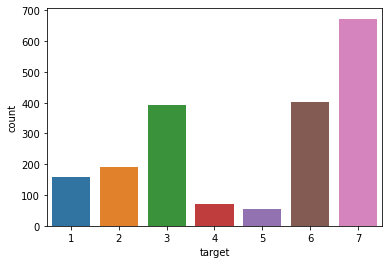

In [ ]:
sns.countplot(df1.target)

In [ ]:
X = np.asarray(normalized_df1[col_list])
y = np.asarray(df1['target'])

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=99)  ##train부터 분리
##train_index, test_index = sss.split(X, y)  <--이건건 왜왜 안되는는 거거?
for train_index, test_index in sss.split(X,y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

In [ ]:
sss2 = StratifiedShuffleSplit(n_splits=1, test_size = 0.4, random_state=99)   ##validation - test 
for val_index, test_index in sss2.split(X_test, y_test):
  X_val, X_test = X[val_index], X[test_index]
  y_val, y_test = y[val_index], y[test_index]

In [ ]:
print(len(X_train), len(X_val), len(X_test))

970 582 389


통계량량 출력력 및및 시각화

In [ ]:
temp1 = pd.DataFrame(X_train, columns=col_list)
temp1['set'] = 'Train set'
temp2 = pd.DataFrame(X_val, columns = col_list)
temp2['set'] = 'Validation set'
temp3 = pd.DataFrame(X_test, columns = col_list)
temp3['set'] = 'Test set'
temp = pd.concat([temp1, temp2, temp3], ignore_index = True)

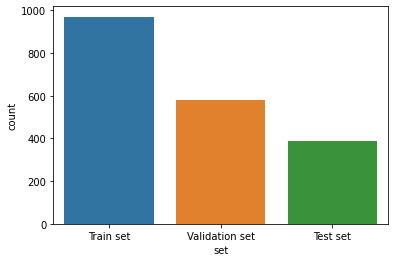

In [ ]:
sns.countplot(temp['set'])

In [ ]:
temp.groupby('set').describe().T

set                       Test set  Train set  Validation set
Length_of_Conveyer count 389.00000  970.00000       582.00000
                   mean    0.34824    0.40766         0.36928
                   std     0.21733    0.25491         0.23186
                   min     0.19224    0.00000         0.00000
                   25%     0.22751    0.23104         0.23104
...                            ...        ...             ...
perimeter_average  min     0.00000    0.00010         0.00000
                   25%     0.00090    0.00087         0.00088
                   50%     0.00311    0.00165         0.00235
                   75%     0.03110    0.00668         0.03034
                   max     1.00000    1.00000         0.13954

[96 rows x 3 columns]

### 1-3) 종속변수들 중 "1"인지 아닌지 판단하려 한다. 종속변수를 1과 1이 아닌 값(이항)으로 치환하고 로지스틱 회귀 분석을 실시하라.confusionMatrix를 확인하고 최적의 cut off value 정하여라.

In [ ]:
y_train[y_train != 1] = 0
y_test[y_test != 1] = 0
y_val[y_val != 1] = 0

In [ ]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
val_proba = logit_model.predict_proba(X_val)  ##probability of expecting input data as 1
P_1 = val_proba[:,1]

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
cutoff_value = np.linspace(0.01, 0.99, 20)
for value in cutoff_value:
  print(value)
  y_pred = P_1
  y_pred[y_pred >= value] = 1
  y_pred[y_pred < value] = 0
  print(confusion_matrix(y_val, y_pred))
  acc = accuracy_score(y_true = y_val, y_pred = y_pred)
  recall = recall_score(y_val, y_pred)
  precision = precision_score(y_val, y_pred)
  print(acc, recall, precision)
  print("================")

0.01
[[263 222]
 [  2  95]]
0.6151202749140894 0.979381443298969 0.2996845425867508
0.06157894736842105
[[263 222]
 [  2  95]]
0.6151202749140894 0.979381443298969 0.2996845425867508
0.1131578947368421
[[263 222]
 [  2  95]]
0.6151202749140894 0.979381443298969 0.2996845425867508
0.16473684210526315
[[263 222]
 [  2  95]]
0.6151202749140894 0.979381443298969 0.2996845425867508
0.2163157894736842
[[263 222]
 [  2  95]]
0.6151202749140894 0.979381443298969 0.2996845425867508
0.26789473684210524
[[263 222]
 [  2  95]]
0.6151202749140894 0.979381443298969 0.2996845425867508
0.3194736842105263
[[263 222]
 [  2  95]]
0.6151202749140894 0.979381443298969 0.2996845425867508
0.37105263157894736
[[263 222]
 [  2  95]]
0.6151202749140894 0.979381443298969 0.2996845425867508
0.4226315789473684
[[263 222]
 [  2  95]]
0.6151202749140894 0.979381443298969 0.2996845425867508
0.47421052631578947
[[263 222]
 [  2  95]]
0.6151202749140894 0.979381443298969 0.2996845425867508
0.5257894736842105
[[263 222]

### 1-4) 종속변수(y)를 다항(7 class)인 상태에서 SVM을 포함하여 3가지 알고리즘으로 평가하라. 각 모델에서 confusionMatrix를 확인하고 최적의 cut off value 를 정하여라.
multi label에서 cutoff value를 계산하는 방법은 따로 나와있는는 것이 없고, 아무래도 문제를 잘못 복기한 것 같습니다. (그대로 0-1 분류로 진행)

SVM Classifier로 진행

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel = 'linear', probability = True)

svm_model.fit(X_train, y_train)
svm_proba = svm_model.predict_proba(X_val)
svm_proba

array([[0.97202133, 0.02797867],
       [0.86111465, 0.13888535],
       [0.98806769, 0.01193231],
       ...,
       [0.91027512, 0.08972488],
       [0.89533461, 0.10466539],
       [0.99311684, 0.00688316]])

In [ ]:
from sklearn.metrics import f1_score

cutoff_value = np.linspace(0.01, 0.99, 20)
for value in cutoff_value:
  svm_1 = svm_proba[:,1].reshape(-1)
  svm_1[svm_1 >= value] = 1
  svm_1[svm_1 < value] = 0
  print('cutoff value:', value, 'f1 score: ', f1_score(y_val, svm_1))
  print(confusion_matrix(y_val, svm_1))
  print('-------------------------')

cutoff value: 0.01 f1 score:  0.3327556325823224
[[101 384]
 [  1  96]]
-------------------------
cutoff value: 0.06157894736842105 f1 score:  0.3327556325823224
[[101 384]
 [  1  96]]
-------------------------
cutoff value: 0.1131578947368421 f1 score:  0.3327556325823224
[[101 384]
 [  1  96]]
-------------------------
cutoff value: 0.16473684210526315 f1 score:  0.3327556325823224
[[101 384]
 [  1  96]]
-------------------------
cutoff value: 0.2163157894736842 f1 score:  0.3327556325823224
[[101 384]
 [  1  96]]
-------------------------
cutoff value: 0.26789473684210524 f1 score:  0.3327556325823224
[[101 384]
 [  1  96]]
-------------------------
cutoff value: 0.3194736842105263 f1 score:  0.3327556325823224
[[101 384]
 [  1  96]]
-------------------------
cutoff value: 0.37105263157894736 f1 score:  0.3327556325823224
[[101 384]
 [  1  96]]
-------------------------
cutoff value: 0.4226315789473684 f1 score:  0.3327556325823224
[[101 384]
 [  1  96]]
-------------------------
cu

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, max_depth= None)
rf_classifier = rf.fit(X_train,y_train)
rf_proba = rf_classifier.predict_proba(X_val)

In [ ]:
cutoff_value = np.linspace(0.01, 0.99, 20)
for value in cutoff_value:
  rf_1 = rf_proba[:,1].reshape(-1)
  rf_1[rf_1 >= value] = 1
  rf_1[rf_1 < value] = 0
  print('cutoff value:', value, 'f1 score: ', f1_score(y_val, rf_1))
  print(confusion_matrix(y_val, rf_1))
  print('-------------------------')

cutoff value: 0.01 f1 score:  0.7317073170731707
[[426  59]
 [  7  90]]
-------------------------
cutoff value: 0.06157894736842105 f1 score:  0.7317073170731707
[[426  59]
 [  7  90]]
-------------------------
cutoff value: 0.1131578947368421 f1 score:  0.7317073170731707
[[426  59]
 [  7  90]]
-------------------------
cutoff value: 0.16473684210526315 f1 score:  0.7317073170731707
[[426  59]
 [  7  90]]
-------------------------
cutoff value: 0.2163157894736842 f1 score:  0.7317073170731707
[[426  59]
 [  7  90]]
-------------------------
cutoff value: 0.26789473684210524 f1 score:  0.7317073170731707
[[426  59]
 [  7  90]]
-------------------------
cutoff value: 0.3194736842105263 f1 score:  0.7317073170731707
[[426  59]
 [  7  90]]
-------------------------
cutoff value: 0.37105263157894736 f1 score:  0.7317073170731707
[[426  59]
 [  7  90]]
-------------------------
cutoff value: 0.4226315789473684 f1 score:  0.7317073170731707
[[426  59]
 [  7  90]]
-------------------------
cu

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_proba = knn.predict_proba(X_val)

In [ ]:
knn_proba

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
cutoff_value = np.linspace(0.01, 0.99, 20)
for value in cutoff_value:
  knn_1 = knn_proba[:,1].reshape(-1)
  knn_1[knn_1 >= value] = 1
  knn_1[knn_1 < value] = 0
  print('cutoff value:', value, 'f1 score: ', f1_score(y_val, knn_1))
  print(confusion_matrix(y_val, knn_1))
  print('-------------------------')

cutoff value: 0.01 f1 score:  0.7798165137614678
[[449  36]
 [ 12  85]]
-------------------------
cutoff value: 0.06157894736842105 f1 score:  0.7798165137614678
[[449  36]
 [ 12  85]]
-------------------------
cutoff value: 0.1131578947368421 f1 score:  0.7798165137614678
[[449  36]
 [ 12  85]]
-------------------------
cutoff value: 0.16473684210526315 f1 score:  0.7798165137614678
[[449  36]
 [ 12  85]]
-------------------------
cutoff value: 0.2163157894736842 f1 score:  0.7798165137614678
[[449  36]
 [ 12  85]]
-------------------------
cutoff value: 0.26789473684210524 f1 score:  0.7798165137614678
[[449  36]
 [ 12  85]]
-------------------------
cutoff value: 0.3194736842105263 f1 score:  0.7798165137614678
[[449  36]
 [ 12  85]]
-------------------------
cutoff value: 0.37105263157894736 f1 score:  0.7798165137614678
[[449  36]
 [ 12  85]]
-------------------------
cutoff value: 0.4226315789473684 f1 score:  0.7798165137614678
[[449  36]
 [ 12  85]]
-------------------------
cu

### 1-5) 종속변수를 제외한 나머지 데이터를 바탕으로 군집분석을 실시하고 최적의 군집수와 군집 레이블을 구하여라. 군집레이블을 추가한 데이터를 1-4에서 만든 모델중 가장 성능이 좋았던 하나의 모델에 다시 학습하여 F1-score를 비교하라

1
2
3
4
5
6
7


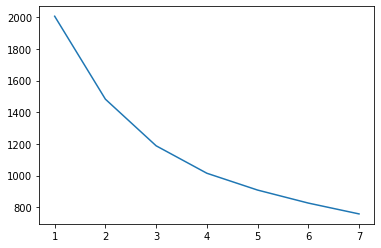

In [ ]:
from sklearn.cluster import KMeans

sum_of_errors = []
for i in range(1,8):
  print(i)
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(X)
  sum_of_errors.append(kmeans.inertia_)

plt.plot(range(1,8), sum_of_errors)
plt.show()

In [ ]:
sum_of_errors

[2006.1620552517852]

In [ ]:
kmeans_4 = KMeans(n_clusters = 4)
kmeans_4.fit(X)

KMeans(n_clusters=4)

In [ ]:
cluster = kmeans_4.labels_
cluster_df1 = normalized_df1.copy(deep = True)
cluster_df1['cluster'] = cluster

In [ ]:
## comparing with former result (knn)
col_list = cluster_df1.columns.to_list()
col_list.remove('target')

X2 = np.asarray(cluster_df1[col_list])
y2 = np.asarray(df1['target'])

for train_index, test_index in sss.split(X2,y2):
  X2_train, X2_test = X2[train_index], X2[test_index]
  y2_train, y2_test = y2[train_index], y2[test_index]

for val_index, test_index in sss2.split(X2_test, y2_test):
  X2_val, X2_test = X2[val_index], X2[test_index]
  y2_val, y2_test = y2[val_index], y2[test_index]


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X2_train, y2_train)
knn_proba = knn.predict_proba(X2_val)

In [ ]:
cutoff_value = np.linspace(0.01, 0.99, 20)
for value in cutoff_value:
  knn_1 = knn_proba[:,1].reshape(-1)
  knn_1[knn_1 >= value] = 1
  knn_1[knn_1 < value] = 0
  print('cutoff value:', value, 'f1 score: ', f1_score(y_val, knn_1))
  print(confusion_matrix(y_val, knn_1))
  print('-------------------------')

cutoff value: 0.01 f1 score:  0.21739130434782605
[[377 108]
 [ 72  25]]
-------------------------
cutoff value: 0.06157894736842105 f1 score:  0.21739130434782605
[[377 108]
 [ 72  25]]
-------------------------
cutoff value: 0.1131578947368421 f1 score:  0.21739130434782605
[[377 108]
 [ 72  25]]
-------------------------
cutoff value: 0.16473684210526315 f1 score:  0.21739130434782605
[[377 108]
 [ 72  25]]
-------------------------
cutoff value: 0.2163157894736842 f1 score:  0.21739130434782605
[[377 108]
 [ 72  25]]
-------------------------
cutoff value: 0.26789473684210524 f1 score:  0.21739130434782605
[[377 108]
 [ 72  25]]
-------------------------
cutoff value: 0.3194736842105263 f1 score:  0.21739130434782605
[[377 108]
 [ 72  25]]
-------------------------
cutoff value: 0.37105263157894736 f1 score:  0.21739130434782605
[[377 108]
 [ 72  25]]
-------------------------
cutoff value: 0.4226315789473684 f1 score:  0.21739130434782605
[[377 108]
 [ 72  25]]
-------------------